# Introduccion

El objetivo de este trabajo se trata de conocer como son los precios de internet y la proporcion de personas que usa internet en distintos paises, trata de analizar si el precio de internet o la proporcion de población que usa intenete tiene alguna relacion con el Pib del pais, con la velocidad de internet etc. 


## Importación de las librerias.

Se importa primero las librerias que se va a utilizar para el analisis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px

## Importación de los datos para el analisis

Se importa los datos de distintos dataset. Principal fuente de datos seria el Kaggle y de Banco mundial.
- Datos de precio de internet de 2020: https://www.kaggle.com/datasets/cityapiio/world-cities-average-internet-prices-2020
- Proporcion de poblacion que usa internet: https://databank.worldbank.org/home.aspx
- Datos de PIB : https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths
- Datos de velocidad: https://www.kaggle.com/datasets/prasertk/internet-broadband-and-mobile-speeds-by-country
- Datos de proporcion de industria en el PIB : https://databank.worldbank.org/home.aspx

In [2]:
df_precio_internet = pd.read_csv('Datos/cities_internet_prices.19-10-2021.csv')
df_poblacion_uso_internet = pd.read_csv('Datos/dato_población_internet.csv')
df_pib = pd.read_csv('Datos/gdp.csv')
df_pib_percapita = pd.read_csv('Datos/gdp_per_capita.csv')
df_industria = pd.read_csv("Datos/Industry (including construction), value added (% of GDP).csv")
df_clasificacion = pd.read_csv('Datos/clasificacion de paise.csv')
df_velocidad = pd.read_csv('Datos/internet broadband and mobile speeds by country.csv')

## Limpieza de datos

Dado que los datos proviene de diferentes dataset se realiza la limpeza de datos para su posterior unión. Los nombre de los paises muestran de diferente forma en los dataset, por lo que se replaza los nombre de los paises para que tenga uno unico. 

In [3]:
df_precio_internet.columns = ['City','Region','Country','InternetPrice']
df_precio_internet['Region']=df_precio_internet['Region'].apply(lambda x : x.replace('"',''))
df_precio_internet['Country']=df_precio_internet['Country'].apply(lambda x : x.replace('"',''))
df_precio_internet["InternetPrice"] = df_precio_internet["InternetPrice"].round(2)

Para el analisis se necesita los precios medio de internet por pais, por lo que se realiza un groupby para sacar los datos. 

In [4]:
df_precio_por_pais = df_precio_internet.groupby("Country")[["InternetPrice"]].mean()
df_precio_por_pais = df_precio_por_pais.reset_index()
df_precio_por_pais['Country']=df_precio_por_pais.iloc[:,0].apply(lambda x : x.replace(' ',''))


se modifica los nombres de los paises de df precio para que posteriortemente pueda hacer el merge sin perder muchos datos. 

In [5]:

df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('Russia', 'Russian Federation')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('UnitedArabEmirates', 'United Arab Emirates')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('NorthMacedonia', 'North Macedonia')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('TrinidadandTobago', 'Trinidad and Tobago')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('DominicanRepublic', 'Dominican Republic')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('Turkey', 'Turkiye')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('Slovakia', 'Slovak Republic')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('SaudiArabia', 'Saudi Arabia')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('BosniaandHerzegovina', 'Bosnia and Herzegovina')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('SouthKorea', 'Korea, Rep.')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('Brunei', 'Brunei Darussalam')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('CzechRepublic', 'Czech Republic')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('TheBahamas', 'Bahamas, The')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('Kyrgyzstan', 'Kyrgyz Republic')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('Egypt', 'Egypt, Arab Rep.')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('UnitedStatesofAmerica', 'United States')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('ElSalvador', 'El Salvador')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('UnitedKingdom', 'United Kingdom')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace('SriLanka', 'Sri Lanka')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace("People'sRepublicofChina", 'China')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace("CostaRica", 'Costa Rica')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace("NewZealand", 'New Zealand')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace("Iran", 'Iran, Islamic Rep.')
df_precio_por_pais["Country"] = df_precio_por_pais["Country"].replace("SouthAfrica", 'South Africa')

solo se necesita datos de 2020, por lo que se elimina las columnas no necesarias y las filas que no contenga información. Se observa que hay missing values en la columna de 2020, ademas de valores sin sentido "..", por lo que se reemplaza todos los valores ".."por NaN, y con el metodo fillna trata de rellenar con datos del año anterior. Pasar los datos de columna 2020 en numeros, y si no hay numeros convierte el contenido de celda en Nan, y se elimina todos los valosres NaN. Para los demas datos,tambien se realiza el mismo proceso, se trata de eliminar las columnas no necesarias y los missiong values que puede haber


In [6]:

df_uso_2020 = df_poblacion_uso_internet.drop(df_poblacion_uso_internet.loc[:,"Series Name":"Series Code"],axis=1)
df_uso_2020 = df_uso_2020.drop(df_poblacion_uso_internet.loc[:,"1990 [YR1990]":"2018 [YR2018]"],axis=1)
df_uso_2020 = df_uso_2020.rename(columns={"Country Name":"Country"})
df_uso_2020 = df_uso_2020.drop(range(217,271))
df_uso_2020["2020 [YR2020]"] = df_uso_2020["2020 [YR2020]"].replace('..', '').replace('', np.nan).astype(float)
df_uso_2020 = df_uso_2020.fillna(method="ffill",axis=1)
df_uso_2020 = df_uso_2020.drop("2019 [YR2019]",axis=1)
df_uso_2020["2020 [YR2020]"]=pd.to_numeric(df_uso_2020["2020 [YR2020]"],'coerce')
df_uso_2020=df_uso_2020.dropna()

Se realiza el merge de las dos dataset mediante la columna de Country. 

In [7]:
df_resultado = df_precio_por_pais.merge(df_uso_2020,on="Country")
df_resultado["2020 [YR2020]"].astype(float)
df_resultado = df_resultado.rename(columns={"2020 [YR2020]":"population internet use 2020"})

Hace las mismas modificaciones con el dataset de PIB,pib percapita, y los demas datos, dado que es muy grande el numero del Pib de los paises, se realiza una transformación para pasar la unidad a cien millones, y se une al df_resultado. 

In [8]:
df_pib = df_pib.drop(df_pib.loc[:,"Code":"2019"],axis=1)
df_pib = df_pib.drop("Unnamed: 65",axis=1)
df_pib = df_pib.rename(columns={"Country Name":"Country","2020":"PIB 2020 (cien millones)"})
df_pib["PIB 2020 (cien millones)"] = df_pib["PIB 2020 (cien millones)"].apply(lambda x : x/(10**11))
df_resultado = df_resultado.merge(df_pib,on="Country")

In [9]:
df_pib_percapita = df_pib_percapita.drop(df_pib_percapita.loc[:,"Code":"2019"],axis=1).drop("Unnamed: 65",axis=1)
df_pib_percapita = df_pib_percapita.rename(columns={"Country Name":"Country","2020":"PIB_per_capita 2020"})
df_resultado = df_resultado.merge(df_pib_percapita,on="Country")

In [10]:
df_industria = df_industria.drop(df_industria.loc[:,"Country Code":"2017"],axis=1).drop(df_industria.loc[:,"2021":],axis=1)
df_industria = df_industria.rename(columns={"Country Name":"Country","2020":"proporcion industris sobre PIB"})
df_industria = df_industria.fillna(method="ffill",axis=1)
df_industria = df_industria.drop(df_industria.loc[:,"2018":"2019"],axis=1)
df_industria["proporcion industris sobre PIB"]=pd.to_numeric(df_industria["proporcion industris sobre PIB"],'coerce')
df_industria=df_industria.dropna()
df_resultado = df_resultado.merge(df_industria,on="Country")

In [11]:
df_clasificacion = df_clasificacion.drop("Region",axis=1).drop("Unnamed: 4",axis=1).drop("Country Name",axis=1)
df_clasificacion = df_clasificacion.rename(columns={"Country Name":"Country"})
df_resultado = df_resultado.merge(df_clasificacion,on="Country Code")

In [12]:
df_velocidad = df_velocidad.drop("Mobile Mbps",axis=1).drop("Mobile Speed Rank",axis=1).drop("Unnamed: 0",axis=1)
df_velocidad["Country"] = df_velocidad["Country"].replace('Russia', 'Russian Federation')
df_velocidad["Country"] = df_velocidad["Country"].replace('Czechia', 'Czech Republic')
df_velocidad["Country"] = df_velocidad["Country"].replace('Kyrgyzstan', 'Kyrgyz Republic')
df_velocidad["Country"] = df_velocidad["Country"].replace('Egypt', 'Egypt, Arab Rep.')
df_velocidad["Country"] = df_velocidad["Country"].replace('Iran', 'Iran, Islamic Rep.')
df_velocidad["Country"] = df_velocidad["Country"].replace('The Bahamas', 'Bahamas, The')
df_velocidad["Country"] = df_velocidad["Country"].replace('Turkey', 'Turkiye')
df_velocidad["Country"] = df_velocidad["Country"].replace('The Bahamas', 'Bahamas, The')
df_velocidad["Country"] = df_velocidad["Country"].replace('Slovakia', 'Slovak Republic')
df_velocidad["Country"] = df_velocidad["Country"].replace('South Korea', 'Korea, Rep.')
df_velocidad["Country"] = df_velocidad["Country"].replace('Brunei', 'Brunei Darussalam')
df_resultado = df_resultado.merge(df_velocidad,on="Country")

Se comprueba que no hay missing values en el df_resultado. 

In [13]:
df_resultado.isnull().sum()

Country                           0
InternetPrice                     0
Country Code                      0
population internet use 2020      0
PIB 2020 (cien millones)          0
PIB_per_capita 2020               0
proporcion industris sobre PIB    0
Income_Group                      0
Broadband Speed Rank              0
Broadband Mbps                    0
dtype: int64

Se puede observar que se cuenta con datos de 101 paises, el df_resultado esta compuesto por 9 columnas. 

In [14]:
df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         101 non-null    object 
 1   InternetPrice                   101 non-null    float64
 2   Country Code                    101 non-null    object 
 3   population internet use 2020    101 non-null    float64
 4   PIB 2020 (cien millones)        101 non-null    float64
 5   PIB_per_capita 2020             101 non-null    float64
 6   proporcion industris sobre PIB  101 non-null    float64
 7   Income_Group                    101 non-null    object 
 8   Broadband Speed Rank            101 non-null    float64
 9   Broadband Mbps                  101 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.7+ KB


In [15]:
df_resultado.describe()

,InternetPrice,population internet use 2020,PIB 2020 (cien millones),PIB_per_capita 2020,proporcion industris sobre PIB,Broadband Speed Rank,Broadband Mbps
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,38.585284,74.664297,7.891355,18784.355428,26.658114,72.762376,57.193861
std,22.838746,20.248308,26.053489,21602.401645,8.546996,44.311883,41.916178
min,5.010000,19.900000,0.037428,822.027682,11.175970,2.000000,5.210000
25%,21.160000,64.600000,0.416203,4145.862936,21.116668,36.000000,26.770000
50%,33.060000,80.530186,1.450092,9122.233430,25.462096,70.000000,47.380000
75%,49.690000,89.812941,4.071007,25517.330665,30.282472,102.000000,85.610000
max,111.430000,100.000000,209.530300,116014.602497,59.133630,167.000000,192.010000


# Visualizacion 

En este aparta se trata de reflejar mediante los graficos ver si existe relacion entre los variables. 

Grafico de precio de internet

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='InternetPrice'>

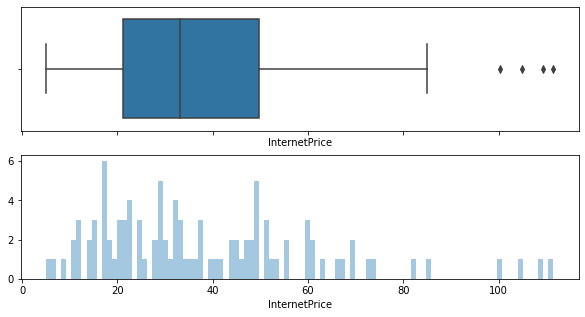

In [16]:
f, (axi1,axi2) = plt.subplots(2, 1, figsize=(10,5), sharex=True);
sns.boxplot(df_resultado["InternetPrice"],ax=axi1);
sns.distplot(df_resultado["InternetPrice"],
             kde=False,
             bins=100,ax=axi2)

Mediante el diagrama de caja podemos ver una asimetría positiva o segada a la derecha ya que la parte más larga de la caja es la parte superior a la mediana. Los datos se concentran en la parte inferior de la distribución. La media suele ser mayor que la mediana. En este caso la mediana es un  38.01, mientras que la media es de 32.58. Ademas mediante el histograma y el diagrama de cajas se puede ver que existe unos valores atipicos en la muestra, tratandose de precios muy elevados por encima de los 100 USD. 


In [17]:
p_0 = np.percentile(df_resultado["InternetPrice"], 0) #Q0 #Min
p_25 = np.percentile(df_resultado["InternetPrice"], 25) #Q1
p_50 = np.percentile(df_resultado["InternetPrice"], 50) #Q2 #Mediana 中位数
p_75 = np.percentile(df_resultado["InternetPrice"], 75) #Q3
p_100 = np.percentile(df_resultado["InternetPrice"], 100) #Q4 #Max los cualtiles.

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(df_resultado["InternetPrice"].mean(),2) )

Valor del percentil 0: 5.010000000000001
Valor del percentil 25: 21.16
Valor del percentil 50: 33.06
Valor del percentil 75: 49.69
Valor del percentil 100: 111.43
Valor media: 38.59


In [18]:
fig = px.choropleth(df_resultado, locations='Country', locationmode='country names',scope='world',color="InternetPrice",  color_continuous_scale='reds')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = "InternetPrice",
    ticks = 'outside',
    tickvals = [5,10,30,50,70,100],
    dtick = 7
))
fig.show()

<AxesSubplot:xlabel='InternetPrice', ylabel='PIB_per_capita 2020'>

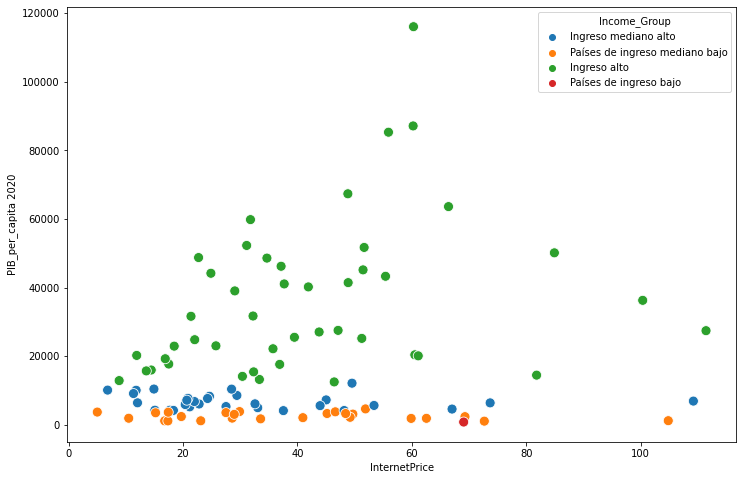

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df_resultado['PIB_per_capita 2020'],
                x=df_resultado['InternetPrice'],
                hue = df_resultado['Income_Group'], # separarlo por la clasificasion del pais
               s=100)

#plt.xlim(left=-0.5,right=10)

Se trata de conocer cual son los paises que tiene el precio de internet mas alto

In [20]:
df_15_max = df_resultado.sort_values(by=["InternetPrice"],ascending=False).head(15)

Text(0.5, 1.0, 'Los 15 paises con precio de intrnet mas altos')

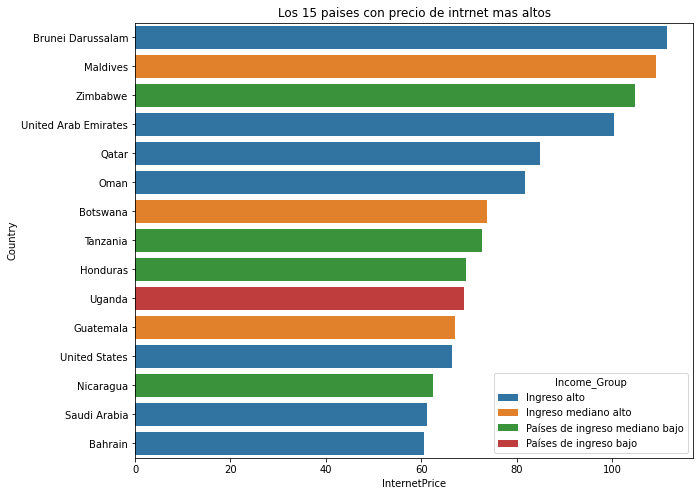

In [55]:
plt.figure(figsize=(10,8))
sns.barplot(y='Country',
            x='InternetPrice',
            data=df_15_max,
            hue='Income_Group',
            hue_order=["Ingreso alto","Ingreso mediano alto","Países de ingreso mediano bajo","Países de ingreso bajo"],
    
            dodge=False,
           ci=None)

plt.title('Los 15 paises con precio de intrnet mas altos')

Mediante un correlagrama se trata de ver si existe relacion entre los variables

<AxesSubplot:>

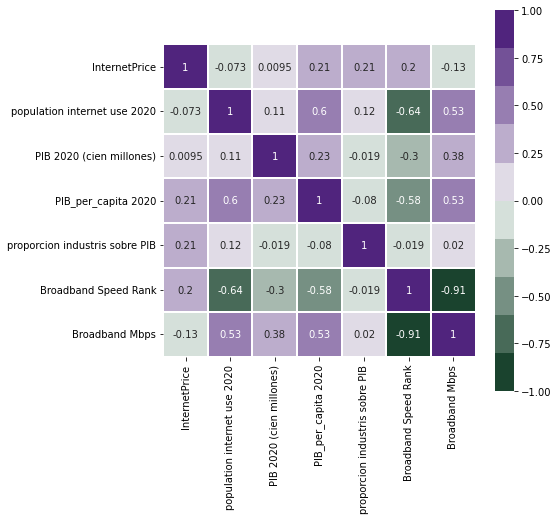

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(df_resultado.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=75, l=25, n=10),
            square=True,
            linewidths=.1,
            annot=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='population internet use 2020'>

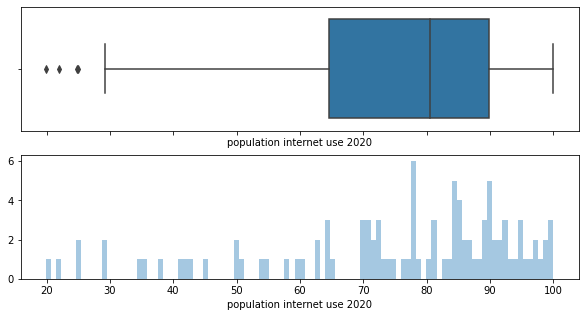

In [23]:
f, (axi1,axi2) = plt.subplots(2, 1, figsize=(10,5), sharex=True);
sns.boxplot(df_resultado["population internet use 2020"],ax=axi1);
sns.distplot(df_resultado["population internet use 2020"],
             kde=False,
             bins=100,ax=axi2)

In [24]:
p_0 = np.percentile(df_resultado["population internet use 2020"], 0) #Q0 #Min
p_25 = np.percentile(df_resultado["population internet use 2020"], 25) #Q1
p_50 = np.percentile(df_resultado["population internet use 2020"], 50) #Q2 #Mediana 中位数
p_75 = np.percentile(df_resultado["population internet use 2020"], 75) #Q3
p_100 = np.percentile(df_resultado["population internet use 2020"], 100) #Q4 #Max los cualtiles.

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(df_resultado["InternetPrice"].mean(),2) )

Valor del percentil 0: 19.9
Valor del percentil 25: 64.6
Valor del percentil 50: 80.53018608
Valor del percentil 75: 89.81294133
Valor del percentil 100: 100.0
Valor media: 38.59


(-0.5, 10.0)

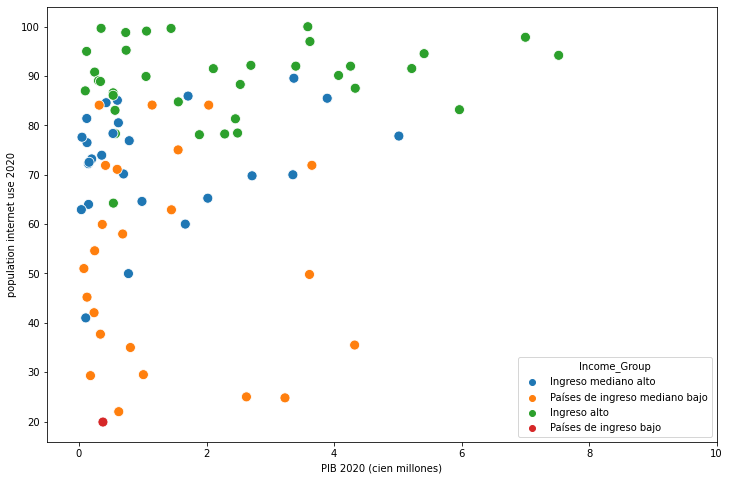

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_resultado['PIB 2020 (cien millones)'],
                y=df_resultado["population internet use 2020"],
                hue = df_resultado['Income_Group'], # separarlo por la clasificasion del pais
               s=100)

plt.xlim(left=-0.5,right=10)

(15.0, 100.0)

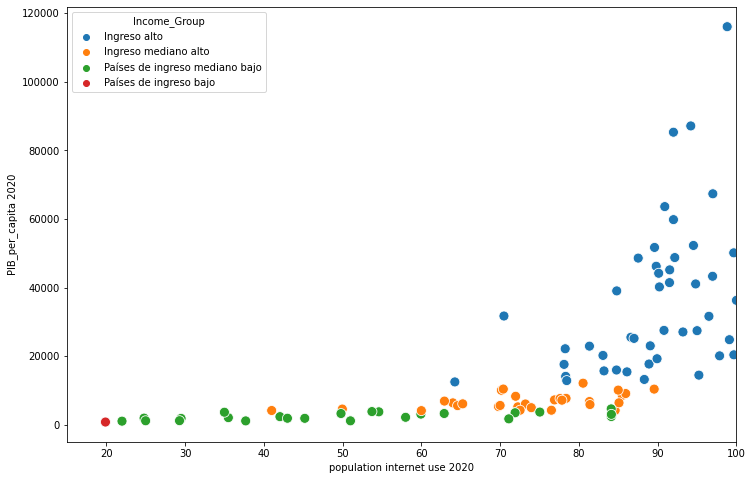

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df_resultado["PIB_per_capita 2020"],
                x=df_resultado["population internet use 2020"],
                hue = df_resultado['Income_Group'],
                hue_order=["Ingreso alto","Ingreso mediano alto","Países de ingreso mediano bajo","Países de ingreso bajo"], # separarlo por la clasificasion del pais
               s=100)

plt.xlim(left=15,right=100)

In [27]:
df_15_min_poblacion = df_resultado.sort_values(by=["population internet use 2020"],ascending=True).head(15)


Text(0.5, 1.0, 'Los 15 paises con menos usuario de internet')

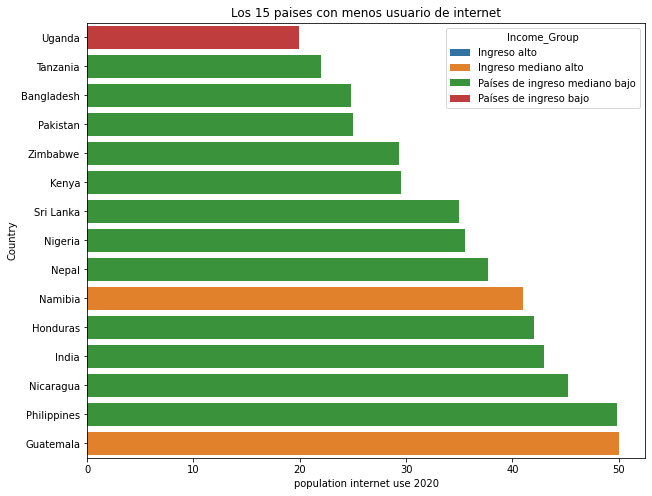

In [52]:
plt.figure(figsize=(10,8))
sns.barplot(y='Country',
            x="population internet use 2020",
            data=df_15_min_poblacion,
            hue='Income_Group',
            hue_order=["Ingreso alto","Ingreso mediano alto","Países de ingreso mediano bajo","Países de ingreso bajo"],
            dodge=False,
           ci=None)

plt.title('Los 15 paises con menos usuario de internet')

In [29]:
fig = px.choropleth(df_resultado, locations='Country', locationmode='country names',scope='world',color="population internet use 2020",  color_continuous_scale='reds')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = "population internet use 2020",
    ticks = 'outside',
    tickvals = [5,10,30,50,70,100],
    dtick = 7
))

<AxesSubplot:xlabel='PIB_per_capita 2020', ylabel='Broadband Mbps'>

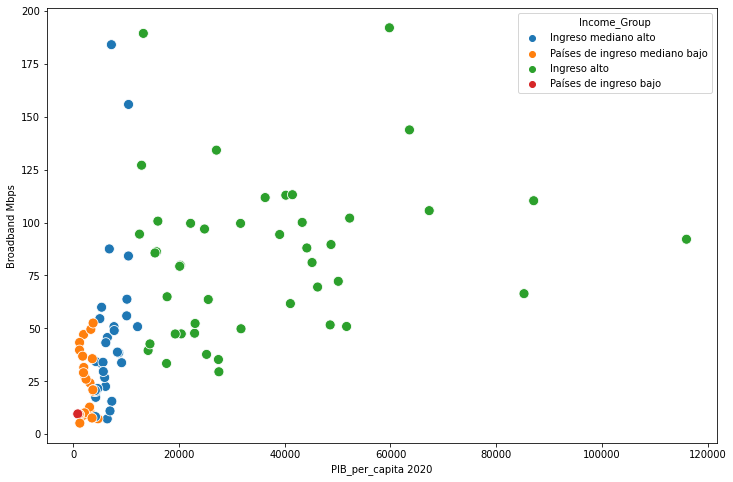

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df_resultado['Broadband Mbps'],
                x=df_resultado['PIB_per_capita 2020'],
                hue = df_resultado['Income_Group'], # separarlo por la clasificasion del pais
               s=100)

<AxesSubplot:xlabel='population internet use 2020', ylabel='Broadband Mbps'>

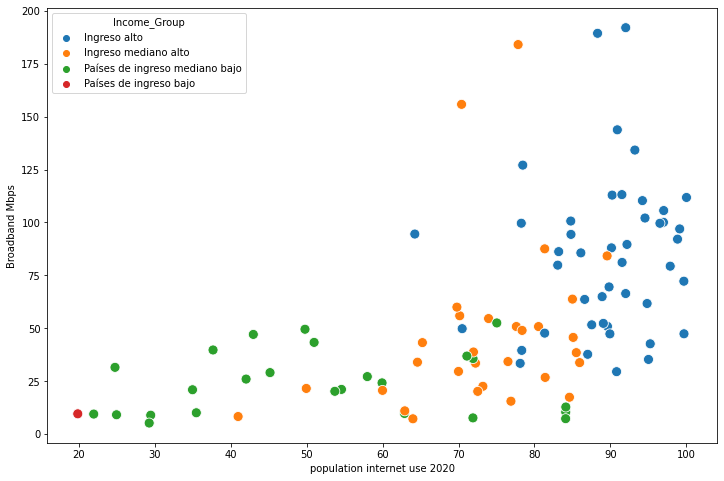

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df_resultado['Broadband Mbps'],
                x=df_resultado['population internet use 2020'],
                hue = df_resultado['Income_Group'], 
                hue_order=["Ingreso alto","Ingreso mediano alto","Países de ingreso mediano bajo","Países de ingreso bajo"],# separarlo por la clasificasion del pais
               s=100)

In [35]:
df_15_min_velocidad = df_resultado.sort_values(by=["Broadband Mbps"],ascending=True).head(15)
df_15_min_velocidad

,Country,InternetPrice,Country Code,population internet use 2020,PIB 2020 (cien millones),PIB_per_capita 2020,proporcion industris sobre PIB,Income_Group,Broadband Speed Rank,Broadband Mbps
100,Zimbabwe,104.830000,ZWE,29.300000,0.180512,1214.509820,35.817145,Países de ingreso mediano bajo,167.0,5.21
13,Botswana,73.690000,BWA,64.000000,0.150619,6404.899932,27.769395,Ingreso mediano alto,160.0,7.22
51,Lebanon,51.900000,LBN,84.100000,0.317352,4649.547646,17.639195,Países de ingreso mediano bajo,159.0,7.27
92,Tunisia,15.200000,TUN,71.900000,0.416203,3521.591948,21.635270,Países de ingreso mediano bajo,158.0,7.64
59,Namibia,48.160000,NAM,41.000000,0.106192,4179.278066,25.848167,Ingreso mediano alto,156.0,8.29
47,Kenya,59.880000,KEN,29.500000,1.010137,1878.580703,17.404452,Países de ingreso mediano bajo,153.0,8.91
67,Pakistan,23.098333,PAK,25.000000,2.626100,1188.859757,18.602069,Países de ingreso mediano bajo,151.0,9.12
89,Tanzania,72.670000,TZA,22.000000,0.624097,1076.469706,28.674935,Países de ingreso mediano bajo,148.0,9.45
93,Uganda,69.060000,UGA,19.900000,0.376004,822.027682,26.490525,Países de ingreso bajo,145.0,9.57
1,Algeria,45.180000,DZA,62.900000,1.450092,3306.858208,20.282297,Países de ingreso mediano bajo,144.0,9.72


In [49]:
df_resultado["Income_Group"].value_counts()

Ingreso alto                      45
Ingreso mediano alto              30
Países de ingreso mediano bajo    25
Países de ingreso bajo             1
Name: Income_Group, dtype: int64

Text(0.5, 1.0, 'Los 15 paises con menor velocidad de internet')

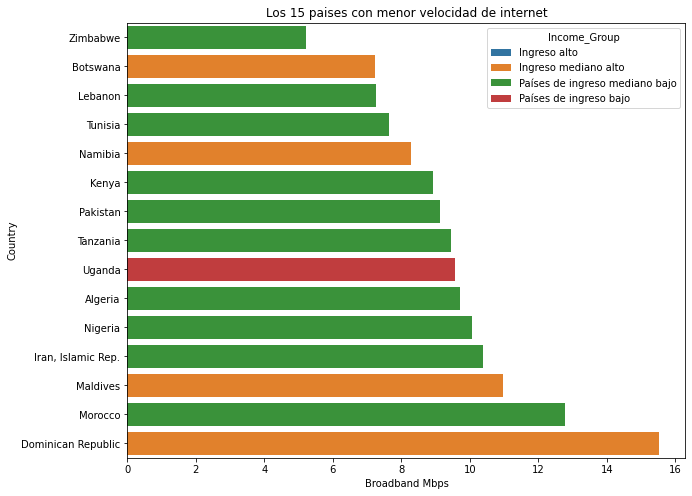

In [51]:


plt.figure(figsize=(10,8))
sns.barplot(y='Country',
            x="Broadband Mbps",
            data=df_15_min_velocidad,
            hue='Income_Group',
            hue_order=["Ingreso alto","Ingreso mediano alto","Países de ingreso mediano bajo","Países de ingreso bajo"],
            dodge=False,
           ci=None
           )

plt.title('Los 15 paises con menor velocidad de internet')